In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import cPickle as pickle

0 -> [6, 6, 6, 6]
8 -> [5, 5, 5, 5]
2 -> [2, 2, 7, 7]
1 -> [8, 8, 8, 8]
5 -> [5, 3, 3, 3]
4 -> [8, 8, 8, 8]
5 -> [2, 2, 2, 6]
4 -> [2, 8, 8, 2]


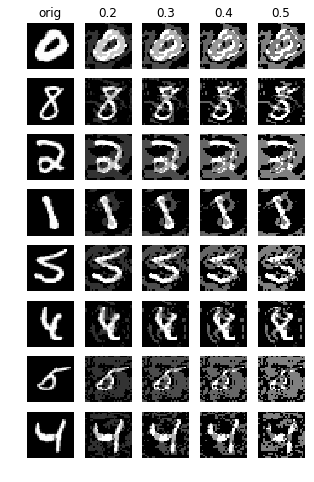

In [53]:
attacks = ['fgs','CW']
models = ['modelA','modelB', 'modelC', 'modelD']
epsilons = ['0.2','0.3','0.4','0.5']
opt_offset = 0
gs = matplotlib.gridspec.GridSpec(len(models)*len(attacks), len(epsilons) + 1)

orig_imgs = pickle.load(open('orig_images.p','rb'))
gt = pickle.load(open('orig_labels.p','rb'))

fig = plt.figure(figsize=(len(epsilons) + 1, len(models)*len(attacks)))

r_count=0
for m in models:
    preds_orig = np.load('%s_labels.p' % m)
    for a in attacks:
#         print m, a
        imgs = np.asarray([pickle.load(open('%s_adv_samples/%s_adv_%s.p' % (a, m, e),'rb')) for e in epsilons])
        preds_adv = np.asarray([pickle.load(open('%s_adv_samples/%s_labels_%s.p' % (a, m, e),'rb')) for e in epsilons])
        if a == 'CW':
            batch = slice(opt_offset, opt_offset + imgs.shape[1])
            orig_imgs_slice = orig_imgs[batch]
            gt_slice = gt[batch]
        else:
            orig_imgs_slice = orig_imgs
            gt_slice = gt
        success = np.not_equal(preds_adv, gt_slice)
        success_any = np.any(success, axis=0)
        success_any_indices, = np.where(success_any)
        index = np.random.choice(success_any_indices)
#         index = success_any_indices[0]

        print gt[index], '->', [pred for pred in preds_adv[:,index]]
        a=fig.add_subplot(gs[r_count, 0])
        if r_count == 0:
            a.set_title('orig')
#         a.set_ylabel('model')
        plt.imshow(orig_imgs_slice[index].reshape((28,28))*255, cmap='gray',vmin=0,vmax=255)
        plt.axis('off')
        for i, e in enumerate(imgs[:, index]):
            a=fig.add_subplot(gs[r_count, i + 1])
            if r_count == 0:
                a.set_title(epsilons[i])
            plt.imshow(imgs[i, index].reshape((28,28))*255, cmap='gray',vmin=0,vmax=255)
            plt.axis('off')
        r_count += 1
plt.show()